<a href="https://colab.research.google.com/github/richikothari07/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Data Exploration and Preparation


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/test.csv') 
len(train)

891

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values


In [ ]:
for i in test.columns:
    print (i + ": "+str(sum(test[i].isnull()))+" missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values


In [ ]:
train_1=train.groupby(["Pclass","SibSp"])
train_1_median=train_1.median()
train_1_median

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [ ]:
test_1=test.groupby(["Pclass","SibSp"])
test_1_median=test_1.median()
test_1_median

PassengerId   Age  Parch       Fare
Pclass SibSp                                     
1      0           1088.0  39.0    0.0   42.50000
       1           1109.5  46.0    0.0   82.06250
       2            969.0  55.0    0.0   51.47920
       3            945.0  28.0    2.0  263.00000
2      0           1117.5  27.0    0.0   13.00000
       1           1139.0  29.0    0.0   26.00000
       2           1077.5  21.0    0.5   31.50000
3      0           1095.5  24.0    0.0    7.82920
       1           1084.0  20.0    1.0   15.24580
       2           1059.0  19.5    0.0   21.67920
       3           1281.0  29.0    1.0   21.07500
       4           1076.0  11.5    2.0   30.25625
       5           1032.0  10.0    2.0   46.90000
       8           1166.0  14.5    2.0   69.55000

In [ ]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [ ]:
train["Age"]=train["Age"].fillna(fill_age(train,train_1_median))

In [ ]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 0 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values


In [ ]:
test["Age"]=test["Age"].fillna(fill_age(test,test_1_median))

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train["Cabin"]=train["Cabin"].fillna("U")
train["Cabin"]=train["Cabin"].map(lambda x: x[0])

In [ ]:
test["Cabin"]=test["Cabin"].fillna("U")
test["Cabin"]=test["Cabin"].map(lambda x: x[0])

In [ ]:
def new_cabin_features(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)  
    

In [ ]:
new_cabin_features(train)
new_cabin_features(test)

DATA VISUALIZATION

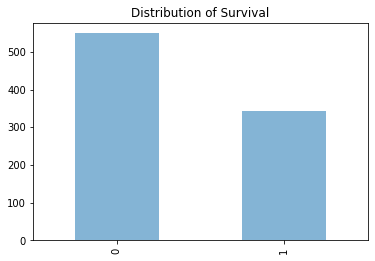

In [ ]:
train.Survived.value_counts().plot(kind='bar', alpha=0.55);
plt.title("Distribution of Survival");    

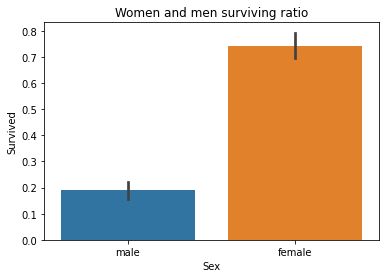

In [ ]:
plt.title('Women and men surviving ratio')
sns.barplot(x='Sex', y='Survived', data=train);

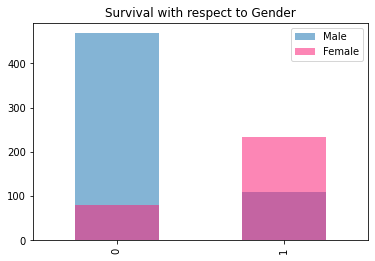

In [ ]:
train_male = train.Survived[train.Sex == 'male'].value_counts().sort_index()
train_female = train.Survived[train.Sex == 'female'].value_counts().sort_index()

train_male.plot(kind='bar',label='Male', alpha=0.55);
train_female.plot(kind='bar', color='#FA2379',label='Female', alpha=0.55);
plt.title("Survival with respect to Gender");
plt.legend(loc='best');

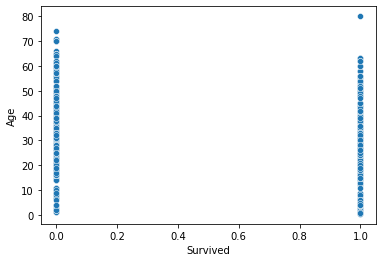

In [ ]:
sns.scatterplot(y = train.Age, x= = train.Survived);

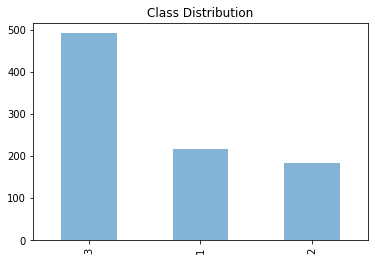

In [ ]:
train.Pclass.value_counts().plot(kind="bar", alpha=0.55);
plt.title("Class Distribution");

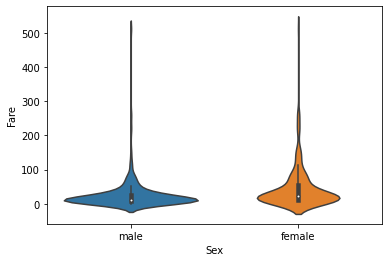

In [ ]:
sns.violinplot(x = 'Sex', y = 'Fare', data = train)

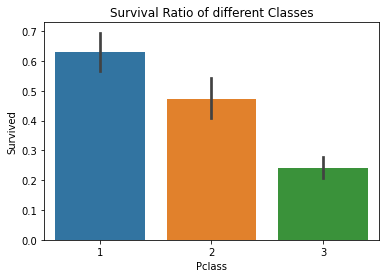

In [ ]:
plt.title('Survival Ratio of different Classes')
sns.barplot(x='Pclass', y='Survived', data=train);

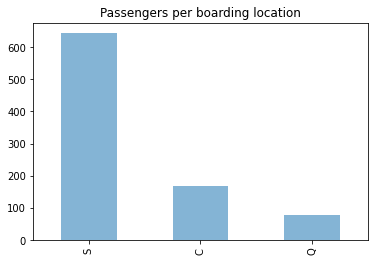

In [ ]:
train.Embarked.value_counts().plot(kind='bar', alpha=0.55);
plt.title("Passengers per boarding location");

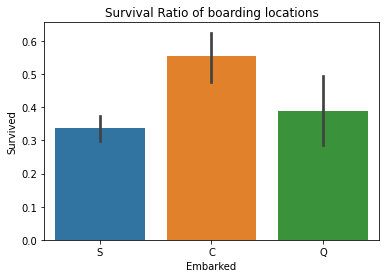

In [ ]:
plt.title('Survival Ratio of boarding locations')
sns.barplot(x='Embarked', y='Survived', data=train);

SVM

In [ ]:
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf
def saperate(data):
    data1 = data.iloc[:len(train)]
    data2 = data.iloc[len(train):]
    return data1, data2

In [ ]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    traindf, testdf    = saperate(data)
    return traindf, testdf
train, test = mapping(train, test)

In [ ]:
X_train = train.drop(['Name','Survived','Cabin','Ticket',
                  'Fare','Embarked'],axis = 1)
y_train = train['Survived']

In [ ]:
npX = np.array(X_train).copy()
npy = np.array(y_train).copy()

In [ ]:
parameters_svm_rbf = {'C':[0.1,10,100,1000],'kernel':['rbf'], 'gamma':[0.005]}

In [ ]:
parameters_svm_linear = {'C':[0.1,10,100,1000],'kernel':['linear']}

In [ ]:
parameters_svm_poly = {'C':[0.1,10,100,1000],'kernel':['poly']}

In [ ]:
grid_rbf = GridSearchCV(estimator = SVC(), param_grid = parameters_svm_rbf, cv = 2, 
                        scoring = 'accuracy')
grid_linear = GridSearchCV(estimator = SVC(), param_grid = parameters_svm_linear, cv = 2, 
                        scoring = 'accuracy')
grid_rbf.fit(npX,npy)
   
grid_linear.fit(npX,npy)
grid_poly = GridSearchCV(estimator = SVC(), param_grid = parameters_svm_poly, cv = 2, 
                        scoring = 'accuracy')
   
grid_poly.fit(npX,npy)
   
   

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100, 1000], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_linear.best_score_)
print(grid_rbf.best_score_)
print(grid_poly.best_score_)
print(grid_poly.best_estimator_.get_params())
print(grid_linear.best_estimator_.get_params())
print(grid_rbf.best_estimator_.get_params())

0.7833753212072354
0.6161611326648864
0.6330150652491561
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.005, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
clf_svm = SVC(**grid_linear.best_estimator_.get_params())
clf_svm.fit(npX,npy)
test = test.drop(['Name','Survived','Cabin','Ticket',
                  'Fare','Embarked'],axis = 1)
nptest = np.array(test)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = test.index, columns = ['Survived'])


In [ ]:
print(predictions)

     Survived
0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
..        ...
413       0.0
414       1.0
415       0.0
416       0.0
417       0.0

[418 rows x 1 columns]
